In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import math
from geographiclib.geodesic import Geodesic
import numpy as np
import scipy.stats as stats

# latitude (N) and longitude (E)
P1 = [46.521592273, 6.573832039]
P2 = [46.521954786, 6.575116326]
E = [46.521330555, 6.573944444]

P1_FILE = "original/Report_P1.xlsx"
P2_FILE = "original/Report_P2.xlsx"

In [2]:
def lat_lng2dist_ang(initial_coords, coords):
    # initial_coords = [lat1, lng1] (evidence)
    # coords = [lat2, lng2] (proposed)
    # returns meters, radians
    results = Geodesic.WGS84.Inverse(initial_coords[0], initial_coords[1], coords[0], coords[1])
    distance = results['s12']
    angle = math.radians(results['azi1'])
    angle = angle if angle > 0 else angle + 2 * math.pi
    return distance, angle

In [26]:
df_p1 = pd.read_excel(P1_FILE, header=1).loc[:, ["Longitude", "Latitude"]]
df_p2 = pd.read_excel(P2_FILE, header=1).loc[:, ["Longitude", "Latitude"]]

df_p1["Distance"] = df_p1.apply(lambda x: lat_lng2dist_ang(P1, [x["Latitude"], x["Longitude"]])[0], axis=1)
df_p1["Angle"] = df_p1.apply(lambda x: lat_lng2dist_ang(P1, [x["Latitude"], x["Longitude"]])[1], axis=1)
df_p1["Point"] = "p1"

df_p2["Distance"] = df_p2.apply(lambda x: lat_lng2dist_ang(P2, [x["Latitude"], x["Longitude"]])[0], axis=1)
df_p2["Angle"] = df_p2.apply(lambda x: lat_lng2dist_ang(P2, [x["Latitude"], x["Longitude"]])[1], axis=1)
df_p2["Point"] = "p2"

E_dist_angle_wrt_P1 = lat_lng2dist_ang(P1, E)
E_dist_angle_wrt_P2 = lat_lng2dist_ang(P2, E)

print("E_dist_angle_wrt_P1", E_dist_angle_wrt_P1)
print("E_dist_angle_wrt_P2", E_dist_angle_wrt_P2)

display(df_p1)
display(df_p2)

df_p1.to_csv("p1.csv", index=False)
df_p2.to_csv("p2.csv", index=False)

E_dist_angle_wrt_P1 (30.344572744546294, 2.8533795973322875)
E_dist_angle_wrt_P2 (113.5817863518005, 4.055162326777971)


,Longitude,Latitude,Distance,Angle,Point
0,6.574031,46.521378,28.294013,2.573090,p1
1,6.574017,46.521367,28.803553,2.627383,p1
2,6.573981,46.521378,26.427016,2.695740,p1
3,6.573981,46.521378,26.427016,2.695740,p1
4,6.573981,46.521378,26.427016,2.695740,p1
...,...,...,...,...,...
362,6.573925,46.521375,25.183714,2.854418,p1
363,6.573950,46.521369,26.371937,2.791247,p1
364,6.573886,46.521331,29.387276,2.999933,p1
365,6.573883,46.521336,28.746071,3.004240,p1


,Longitude,Latitude,Distance,Angle,Point
0,6.574639,46.521964,36.648526,4.740006,p2
1,6.574639,46.521964,36.648526,4.740006,p2
2,6.574639,46.521964,36.648526,4.740006,p2
3,6.574639,46.521964,36.648526,4.740006,p2
4,6.574581,46.521947,41.119172,4.691943,p2
...,...,...,...,...,...
327,6.573892,46.522147,96.374063,4.936224,p2
328,6.573892,46.522147,96.374063,4.936224,p2
329,6.573892,46.522147,96.374063,4.936224,p2
330,6.573894,46.522147,96.166248,4.936716,p2


Text(6.573944444, 46.521330555, 'E')

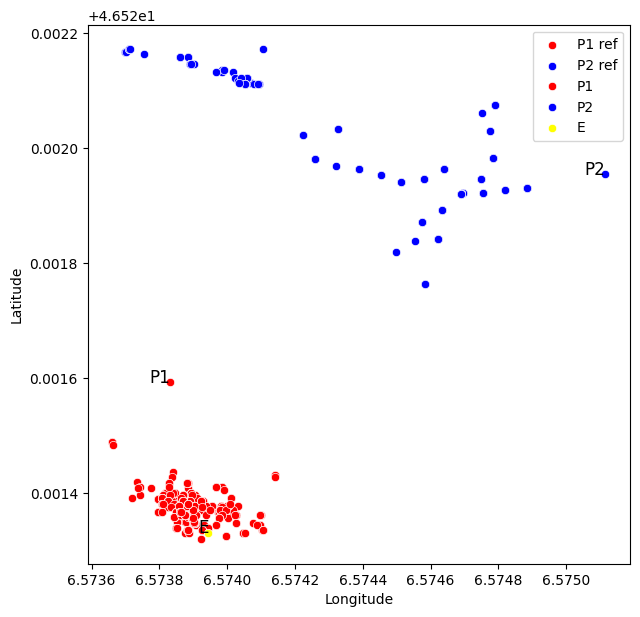

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=df_p1, x="Longitude", y="Latitude", ax=ax, label="P1 ref", color="red")
sns.scatterplot(data=df_p2, x="Longitude", y="Latitude", ax=ax, label="P2 ref", color="blue")
sns.scatterplot(x=[P1[1]], y=[P1[0]], ax=ax, label="P1", color="red")
sns.scatterplot(x=[P2[1]], y=[P2[0]], ax=ax, label="P2", color="blue")
sns.scatterplot(x=[E[1]], y=[E[0]], ax=ax, label="E", color="yellow")
ax.text(P1[1], P1[0], "P1", fontsize=12, ha='right')
ax.text(P2[1], P2[0], "P2", fontsize=12, ha='right')
ax.text(E[1], E[0], "E", fontsize=12, ha='right')



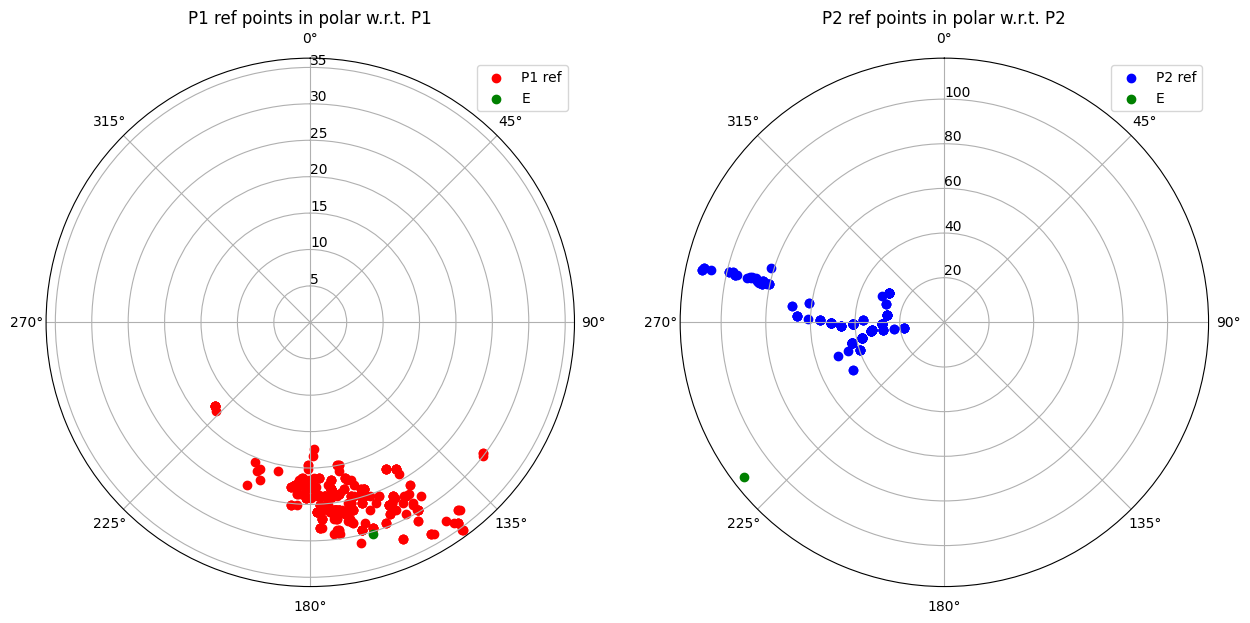

In [28]:
# polar plot
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(15,7))
for ax1 in ax.flatten():
    ax1.set_theta_zero_location('N')
    ax1.set_theta_direction(-1)
    ax1.set_rlabel_position(0)

ax[0].scatter(df_p1["Angle"], df_p1["Distance"], label="P1 ref", color="red")
ax[0].set_title("P1 ref points in polar w.r.t. P1")
ax[0].scatter(E_dist_angle_wrt_P1[1], E_dist_angle_wrt_P1[0], label="E", color="green")
ax[0].legend()

ax[1].scatter(df_p2["Angle"], df_p2["Distance"], label="P2 ref", color="blue")
ax[1].set_title("P2 ref points in polar w.r.t. P2")
ax[1].scatter(E_dist_angle_wrt_P2[1], E_dist_angle_wrt_P2[0], label="E", color="green")
ax[1].legend()
plt.show()


The polar chart seems to make sense. So P1 and P2 are computed w.r.t. the evidence point. Azimuth is measured clockwise, 0 deg being straight up. Therefore P2 is at approx. 45 degrees of azimuth w.r.t E and P1 is a bit below 360 deg azimuth.


### Bayesian approach

In [6]:
p1_draws_df = pd.read_csv('p1_draws.csv')
p2_draws_df = pd.read_csv('p2_draws.csv')

p1_mean = p1_draws_df[['mu_dist', 'mu_angle']].values
p1_covariance = p1_draws_df[['sigma11', 'sigma12', 'sigma21', 'sigma22']].values.reshape(-1, 2, 2)
p2_mean = p2_draws_df[['mu_dist', 'mu_angle']].values
p2_covariance = p2_draws_df[['sigma11', 'sigma12', 'sigma21', 'sigma22']].values.reshape(-1, 2, 2)

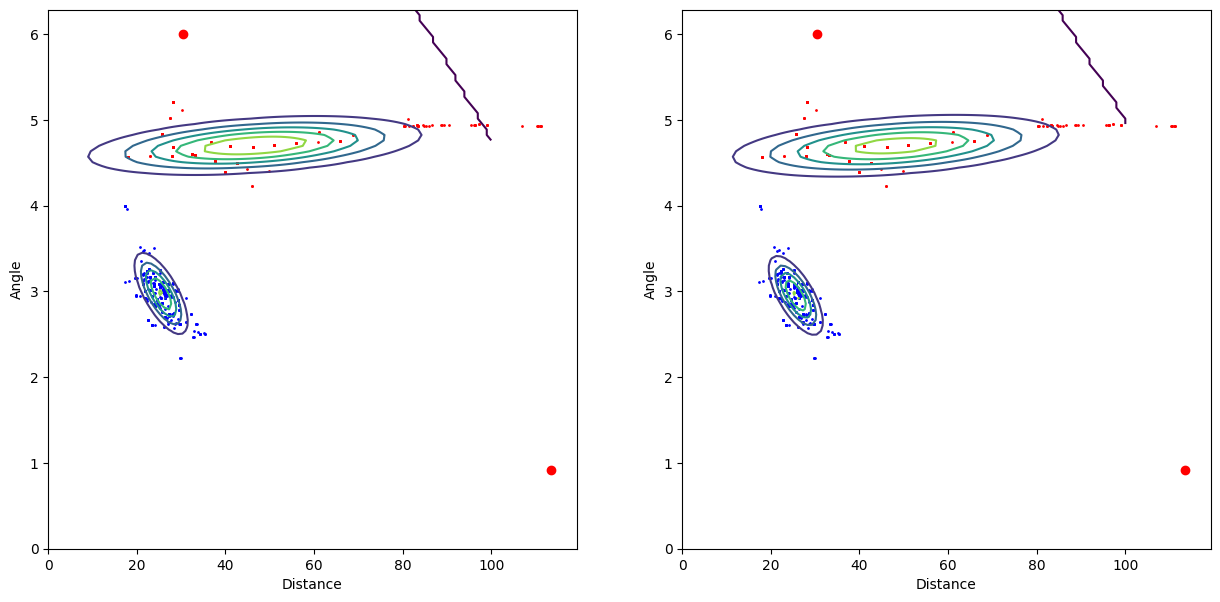

In [13]:
# Create a grid of points
distance = np.linspace(0, 100, 100)
angle = np.linspace(0, 2* math.pi, 100)
X, Y = np.meshgrid(distance, angle)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Sample points from the multivariate normal parametrized by the draws

zs = []
# Plot the contours
fig, ax = plt.subplots(1,2, figsize=(15, 7))
for ax1 in ax.flatten():
    i = np.random.choice(range(1000))
    Z = multivariate_normal.pdf(pos, mean=p1_mean[i], cov=p1_covariance[i])
    ax1.contour(X, Y, Z, 5)
    Z = multivariate_normal.pdf(pos, mean=p2_mean[i], cov=p2_covariance[i])
    ax1.contour(X, Y, Z, 5)
    ax1.set_xlabel('Distance')
    ax1.set_ylabel('Angle')


    # Plot the points
    ax1.scatter(df_p1['Distance'], df_p1['Angle'], c='b', label='P1', s=1)
    ax1.scatter(df_p2['Distance'], df_p2['Angle'], c='r', label='P2', s=1)
    ax1.scatter(E_dist_angle_wrt_P1[0], E_dist_angle_wrt_P1[1], c='r', label='P1 (true)')
    ax1.scatter(E_dist_angle_wrt_P2[0], E_dist_angle_wrt_P2[1], c='r', label='P2 (true)')


In [24]:
E_dist_angle_wrt_P1 = lat_lng2dist_ang(P1, E)
E_dist_angle_wrt_P2 = lat_lng2dist_ang(P2, E)

Probability of E given P1: 0.06288894994882085 +/- 0.007200723807143485
Probability of E given P2: 1.2708313829279894e-09 +/- 2.0244127167523327e-09
LR: 326,528,824 +/- 1,223,914,092


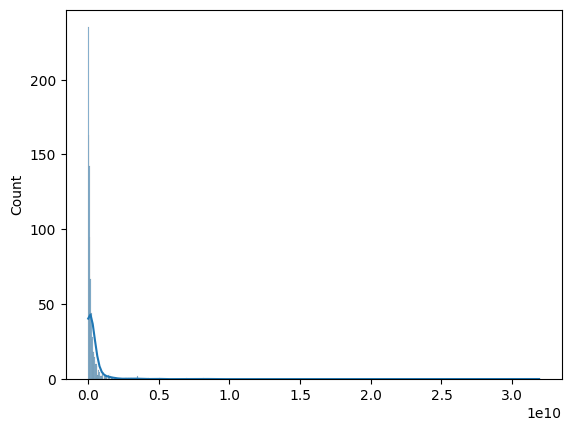

In [36]:
e_given_p1_probs = []
e_given_p2_probs = []

for i in range(1000):
    e_given_p1_probs.append(stats.multivariate_normal.pdf(E_dist_angle_wrt_P1, mean=p1_mean[i], cov=p1_covariance[i]))
    e_given_p2_probs.append(stats.multivariate_normal.pdf(E_dist_angle_wrt_P2, mean=p2_mean[i], cov=p2_covariance[i]))

e_given_p1_probs = np.array(e_given_p1_probs)
e_given_p2_probs = np.array(e_given_p2_probs)

print(f"Probability of E given P1: {e_given_p1_probs.mean()} +/- {e_given_p1_probs.std()}")
print(f"Probability of E given P2: {e_given_p2_probs.mean()} +/- {e_given_p2_probs.std()}")

lrs = (e_given_p1_probs / e_given_p2_probs)
sns.histplot(lrs, kde=True)
print(f"LR: {round(lrs.mean()):,} +/- {round(lrs.std()):,}")

The distribution has an extremely long tail. Therefore, normal confidence intervals that assume normality are useless. TODO: estimate a high density interval.